**There is info about 20,000 customers. Given the information, we need to predict whether the customer will respond to a marketting campaign or not.**

**The 'Target' column has info about the past behavior of customer; 0 indicating that the customer didn't respond to the campaign, 1 indicating that the customer did respond to the campaign.**

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Only execute this cell if the directory in which your dataset is different from the directory that you are running the
#Jupyter Notebook

#import os
#os.chdir('')

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
bank_df = pd.read_csv("Banking Dataset.csv")

In [5]:
bank_df.head(10) 

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,AGE_BKT,SCR,Holding_Period
0,C1,0,30,M,160378.60,SAL,2,26-30,826,9
1,C10,1,41,M,84370.59,SELF-EMP,14,41-45,843,9
2,C100,0,49,F,60849.26,PROF,49,46-50,328,26
3,C1000,0,49,M,10558.81,SAL,23,46-50,619,19
4,C10000,0,43,M,97100.48,SENP,3,41-45,397,8
5,C10001,0,30,M,160378.60,SAL,2,26-30,781,11
6,C10002,0,43,M,26275.55,PROF,23,41-45,354,12
7,C10003,0,53,M,33616.47,SAL,45,>50,239,5
8,C10004,0,45,M,1881.37,PROF,3,41-45,339,13
9,C10005,0,37,M,3274.37,PROF,33,36-40,535,9


In [6]:
bank_df.shape

(20000, 10)

In [7]:
bank_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         20000 non-null  object 
 1   Target          20000 non-null  int64  
 2   Age             20000 non-null  int64  
 3   Gender          20000 non-null  object 
 4   Balance         20000 non-null  float64
 5   Occupation      20000 non-null  object 
 6   No_OF_CR_TXNS   20000 non-null  int64  
 7   AGE_BKT         20000 non-null  object 
 8   SCR             20000 non-null  int64  
 9   Holding_Period  20000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.5+ MB


In [8]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in bank_df.columns: 
    if bank_df[feature].dtype == 'object':
        bank_df[feature] = pd.Categorical(bank_df[feature]).codes 

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         20000 non-null  int16  
 1   Target          20000 non-null  int64  
 2   Age             20000 non-null  int64  
 3   Gender          20000 non-null  int8   
 4   Balance         20000 non-null  float64
 5   Occupation      20000 non-null  int8   
 6   No_OF_CR_TXNS   20000 non-null  int64  
 7   AGE_BKT         20000 non-null  int8   
 8   SCR             20000 non-null  int64  
 9   Holding_Period  20000 non-null  int64  
dtypes: float64(1), int16(1), int64(5), int8(3)
memory usage: 1.0 MB


In [10]:
# capture the target column ("default") into separate vectors for training set and test set

X = bank_df.drop(["Target","Cust_ID"] , axis=1)

y = bank_df.pop("Target")




In [11]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


# Ensemble RandomForest Classifier

In [12]:
rfcl = RandomForestClassifier(n_estimators = 501) # 'n_estimators' is the no. of trees within the random forest
rfcl = rfcl.fit(X_train, train_labels)

In [13]:
rfcl.oob_score

False

**'oob_score' tells whether Out of Bag score is stored within the classifier or not.**

**To calculate 'oob_score', pass 'oob_score' as one of parameters in classifier declaration.**

In [14]:
rfcl = RandomForestClassifier(n_estimators = 501, oob_score=True)
rfcl = rfcl.fit(X_train, train_labels)

In [15]:
rfcl.oob_score

True

In [16]:
rfcl.oob_score_   # This is the Out of Bag Score, or 'Accuracy'

0.9198571428571428

In [17]:
1-rfcl.oob_score_  # This is the error

0.08014285714285718

In [18]:
# 'max_depth' restricts the 'depth' of decision trees in Random forest
# In this case, no tree will have a depth more than 10

# 'max_features' specifies how many no. of independent variables to be chosen for the any split
# in this case, of the 8 independent variables in dataset, 5 variables are randomly chosen before every split in each Decision tree

# 'min_samples_leaf' is the minimum no. of samples to be present in terminal nodes after split happens
# usually 'min_samples_leaf' is chosen within 1%-3% of total data

# 'min_samples_split' is the minimum no. of samples to be present in a node to be split further

rfcl = RandomForestClassifier(n_estimators = 501, oob_score=True, max_depth=10, max_features=5, min_samples_leaf=50,min_samples_split=110)
rfcl = rfcl.fit(X_train, train_labels)

In [19]:
rfcl.oob_score_ 

0.916

**We see that the accuracy is affected by somewhere 0.3% only even after pruning the tree. We can say that the accuracy is more or less retained.**

In [20]:
# at times, we may want to choose from a set of values to be passed for pruning

from sklearn.model_selection import GridSearchCV

#creating a dictionary that has multiple values for various parameters

param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

# there are 5 variables and 2 values in each variable, so in total 2^5, i.e, 32 combinations are possible that will be checked
# by 'GridSearchCV'. We can also pass more than 2 values for any variable, but that burdens the computation.

rfcl = RandomForestClassifier()

# 'cv' indicates the no. of folds in cross-validation, 5 by default if not specified.

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

# 'GridSearchCV' will tell the best possible combination by the 'oob_score' technique.

In [21]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [301, 501]})

In [22]:
# 'best_params_' gives the best possible combination of parameters
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [23]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=50,
                       min_samples_split=150, n_estimators=301)

In [24]:
best_grid = grid_search.best_estimator_

In [25]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [26]:
# for probabilities
ytrain_predict_prob = best_grid.predict_proba(X_train)
ytest_predict_prob = best_grid.predict_proba(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
confusion_matrix(train_labels,ytrain_predict)

array([[12750,    32],
       [ 1145,    73]], dtype=int64)

In [29]:
confusion_matrix(test_labels,ytest_predict)

array([[5474,   11],
       [ 486,   29]], dtype=int64)

In [30]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     12782
           1       0.70      0.06      0.11      1218

    accuracy                           0.92     14000
   macro avg       0.81      0.53      0.53     14000
weighted avg       0.90      0.92      0.88     14000



In [31]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5485
           1       0.72      0.06      0.10       515

    accuracy                           0.92      6000
   macro avg       0.82      0.53      0.53      6000
weighted avg       0.90      0.92      0.88      6000



**We can see that the recall for the model is very low, hence, the f1-score is also coming out to be low.**

**Sir says - "The above problem of low recall can be offset by choosing a different cut-off value(default 0.5) by predicting the probabilities."**

In [32]:
import matplotlib.pyplot as plt

AUC: 0.843


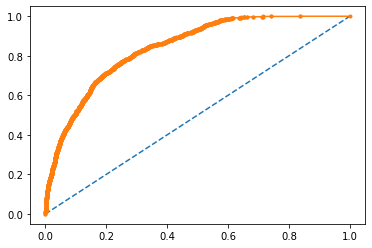

In [33]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.777


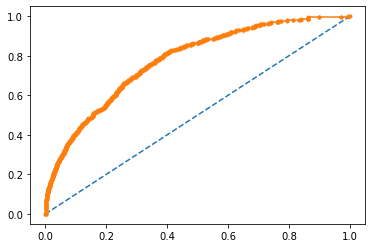

In [34]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**The testing data is probably under-performing as compared to training data, because we see the AUC is lesser for testing data and the ROC curve for testing data is flatter.**